In [25]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import gcsfs
from scipy import signal

In [26]:
# Experiments to process
experiment_ids = ['historical', 'ssp370']

# Seasons to process
seasons = ['all','DJF','JJA']

# Time slices (future) to process
time_slices = ([['1991','2020'],
                ['2001','2030'],
                ['2011','2040'],
                ['2021','2050'],
                ['2031','2060'],
                ['2041','2070'],
                ['2051','2080'],
                ['2061','2090'],
                ['2071','2100']])

In [27]:
tresults_new=pd.read_csv('tresults.csv',index_col=0)
tresults_new

,CAMS-CSM1-0,MRI-ESM2-0,GFDL-ESM4,CanESM5,CESM2-WACCM,BCC-CSM2-MR,BCC-ESM1,CESM2,IPSL-CM6A-LR,MIROC6
t1991,0.350626,0.760193,0.589783,0.905243,0.768097,0.666351,0.802085,0.718262,0.716827,0.376282
t2001,0.492920,0.897766,0.695282,1.198212,0.877380,0.791522,0.950498,0.917542,0.845734,0.547302
t2011,0.585576,1.023926,0.812836,1.438416,1.007812,0.964405,1.080176,1.094421,1.021454,0.697571
t2021,0.772982,1.267822,1.021606,1.863525,1.271332,1.241890,1.282089,1.337646,1.346252,0.924072
t2031,0.993943,1.614258,1.295166,2.394562,1.642242,1.599642,NaN,1.657043,1.789948,1.235840
t2041,1.272332,1.980377,1.631042,2.996094,2.098663,1.969405,NaN,2.027405,2.248840,1.533264
t2051,1.531312,2.343811,2.001801,3.578979,2.548523,2.325534,NaN,2.485107,2.722992,1.861328
t2061,1.834118,2.689697,2.398132,4.184479,3.027191,2.711012,NaN,3.025238,3.222717,2.143311
t2071,2.101574,3.042175,2.761627,4.786499,3.494812,3.085562,NaN,3.541107,3.826843,2.475281


In [28]:
tresults_dict=tresults_new.to_dict()

In [29]:
dt=np.zeros((len(time_slices),len(tresults_dict)))*np.nan 

In [30]:
modelcount=0
modelnames=[]
for model in tresults_dict:
    modelnames.append(model)
    timecount=0
    for timeperiod in tresults_dict[model]:
        dt[timecount,modelcount]=tresults_dict[model][timeperiod]
        timecount=timecount+1
    modelcount=modelcount+1

In [31]:
dt

array([[0.350626  , 0.76019287, 0.58978271, 0.90524292, 0.76809692,
        0.66635058, 0.80208476, 0.71826172, 0.71682739, 0.37628174],
       [0.49292038, 0.89776611, 0.69528198, 1.19821167, 0.87738037,
        0.79152161, 0.95049756, 0.9175415 , 0.84573364, 0.54730225],
       [0.58557645, 1.02392578, 0.81283569, 1.43841553, 1.0078125 ,
        0.96440512, 1.08017615, 1.09442139, 1.02145386, 0.6975708 ],
       [0.77298177, 1.26782227, 1.02160645, 1.86352539, 1.27133179,
        1.24188957, 1.28208879, 1.33764648, 1.34625244, 0.92407227],
       [0.99394305, 1.61425781, 1.29516602, 2.39456177, 1.64224243,
        1.59964209,        nan, 1.65704346, 1.78994751, 1.23583984],
       [1.27233195, 1.9803772 , 1.63104248, 2.99609375, 2.09866333,
        1.96940471,        nan, 2.02740479, 2.24884033, 1.53326416],
       [1.53131223, 2.34381104, 2.00180054, 3.57897949, 2.54852295,
        2.32553355,        nan, 2.48510742, 2.72299194, 1.86132812],
       [1.83411814, 2.68969727, 2.3981323

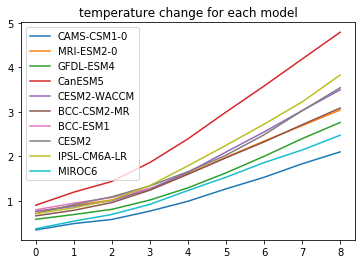

In [32]:
plt.plot(dt)
plt.title('temperature change for each model')
plt.legend(modelnames)

In [33]:
plt.savefig('temperature.png')

<Figure size 432x288 with 0 Axes>

In [34]:
dsdG_djf_new=pd.read_csv('dsdG_djf.csv',index_col=0)
dsdG_djf_new

,CESM2-WACCM,BCC-CSM2-MR,MIROC6,CanESM5,CAMS-CSM1-0,GFDL-ESM4,MRI-ESM2-0,CESM2,BCC-ESM1,IPSL-CM6A-LR
t1991,1.022184,0.982603,0.983910,1.041476,0.970020,1.035774,0.927374,1.017618,0.963441,1.041305
t2001,1.021454,1.012408,1.027627,1.072001,0.998661,1.034346,0.965627,1.030965,1.002681,1.061704
t2011,1.039816,1.038669,1.004109,1.079521,1.013537,1.030939,0.958772,1.066046,1.018551,1.069258
t2021,1.060674,1.057812,1.006428,1.108786,1.025562,1.034678,0.983005,1.082278,1.032016,1.065308
t2031,1.109779,1.070512,0.993048,1.127890,1.045689,1.057237,1.008734,1.105388,NaN,1.087724
t2041,1.121593,1.073504,1.029917,1.151836,1.043397,1.090690,1.094887,1.121343,NaN,1.111745
t2051,1.145935,1.082534,1.034896,1.170736,1.049514,1.102006,1.142753,1.147366,NaN,1.158009
t2061,1.157643,1.092499,1.038537,1.208483,1.042049,1.095531,1.158891,1.186820,NaN,1.194014
t2071,1.191385,1.105286,1.048009,1.239221,1.059414,1.099062,1.161113,1.213157,NaN,1.237170


In [35]:
dsdG_djf=dsdG_djf_new.to_dict()

In [36]:
dsdG_djf_np=np.zeros((len(time_slices),len(dsdG_djf)))*np.nan 

In [37]:
modelcount=0
for model in tresults_dict:
    timecount=0
    for timeperiod in dsdG_djf[model]:
        dsdG_djf_np[timecount,modelcount]=dsdG_djf[model][timeperiod]
        timecount=timecount+1
    modelcount=modelcount+1

In [38]:
dsdG_djf_np

array([[0.97001951, 0.92737365, 1.03577399, 1.04147601, 1.0221839 ,
        0.98260308, 0.96344096, 1.01761818, 1.0413053 , 0.98390967],
       [0.99866134, 0.9656269 , 1.0343461 , 1.07200062, 1.02145362,
        1.01240815, 1.00268099, 1.03096521, 1.06170416, 1.02762699],
       [1.01353749, 0.95877194, 1.03093898, 1.07952094, 1.03981602,
        1.03866912, 1.01855125, 1.06604552, 1.06925786, 1.00410914],
       [1.02556207, 0.98300475, 1.03467751, 1.10878611, 1.06067407,
        1.05781245, 1.03201613, 1.08227813, 1.06530845, 1.00642753],
       [1.04568893, 1.00873399, 1.05723727, 1.12788951, 1.10977948,
        1.07051213,        nan, 1.10538793, 1.08772409, 0.99304754],
       [1.04339748, 1.0948875 , 1.09069026, 1.1518364 , 1.121593  ,
        1.07350369,        nan, 1.12134326, 1.11174512, 1.02991724],
       [1.04951387, 1.14275289, 1.10200596, 1.17073643, 1.14593542,
        1.08253419,        nan, 1.1473664 , 1.15800941, 1.03489614],
       [1.04204886, 1.15889072, 1.0955305

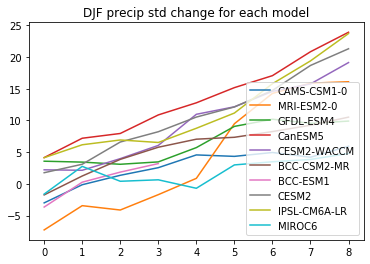

In [39]:
plt.plot((dsdG_djf_np-1)*100)
plt.title('DJF precip std change for each model')
plt.legend(modelnames)

In [40]:
plt.savefig('precip.png')

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Precip change (%)')

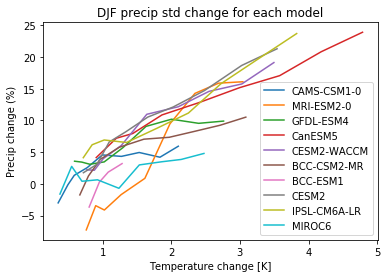

In [41]:
plt.plot(dt,(dsdG_djf_np-1)*100)
plt.title('DJF precip std change for each model')
plt.legend(modelnames)
plt.xlabel('Temperature change [K]')
plt.ylabel('Precip change (%)')


# Needed: get rid of models with NaNs before taking the multi-model mean

In [42]:
for i in range(10):
    print(modelnames[i])
    print(dt[:,i])
    print(dsdG_djf_np[:,i])
    print

CAMS-CSM1-0
[0.350626   0.49292038 0.58557645 0.77298177 0.99394305 1.27233195
 1.53131223 1.83411814 2.10157417]
[0.97001951 0.99866134 1.01353749 1.02556207 1.04568893 1.04339748
 1.04951387 1.04204886 1.05941389]
MRI-ESM2-0
[0.76019287 0.89776611 1.02392578 1.26782227 1.61425781 1.9803772
 2.34381104 2.68969727 3.04217529]
[0.92737365 0.9656269  0.95877194 0.98300475 1.00873399 1.0948875
 1.14275289 1.15889072 1.16111279]
GFDL-ESM4
[0.58978271 0.69528198 0.81283569 1.02160645 1.29516602 1.63104248
 2.00180054 2.39813232 2.7616272 ]
[1.03577399 1.0343461  1.03093898 1.03467751 1.05723727 1.09069026
 1.10200596 1.09553051 1.09906173]
CanESM5
[0.90524292 1.19821167 1.43841553 1.86352539 2.39456177 2.99609375
 3.57897949 4.18447876 4.78649902]
[1.04147601 1.07200062 1.07952094 1.10878611 1.12788951 1.1518364
 1.17073643 1.20848346 1.23922086]
CESM2-WACCM
[0.76809692 0.87738037 1.0078125  1.27133179 1.64224243 2.09866333
 2.54852295 3.02719116 3.49481201]
[1.0221839  1.02145362 1.0398160

In [43]:
np.nanmean(dt,axis=1)

array([0.66537476, 0.82141571, 0.97265933, 1.23292172, 1.58029378,
       1.97304697, 2.3777097 , 2.80398837, 3.23505338])

In [44]:
np.nanmean((dsdG_djf_np-1)*100,axis=1)

array([-0.14295745,  2.27474076,  3.19218267,  4.56547198,  6.73334287,
        9.32126584, 11.486119  , 13.04962952, 15.04240688])

Text(0, 0.5, 'Precip change (%)')

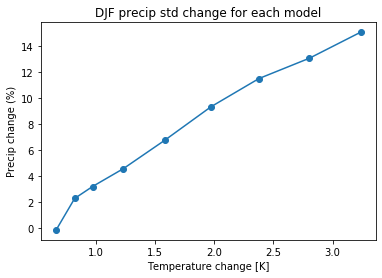

In [45]:
plt.plot(np.nanmean(dt,axis=1),np.nanmean((dsdG_djf_np-1)*100,axis=1),marker='o')
plt.title('DJF precip std change for each model')
plt.xlabel('Temperature change [K]')
plt.ylabel('Precip change (%)')

In [46]:
plt.savefig('variabilitychange.png')

<Figure size 432x288 with 0 Axes>